In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Make the DF from the global_space_launches.csv
resource_dir = os.path.join('.','resources')
df = pd.read_csv(os.path.join(f'{resource_dir}','global_space_launches.csv'))
df['Companys Country of Origin'].unique()

array(['USA', 'China', 'Russia', 'Japan', 'Isreal', 'Iran', 'Multi',
       'India', 'Germany', 'North Korea', 'South Korea', 'Brazil',
       'Ukraine', 'Italy', 'France', 'England', "Arme de l'Air"],
      dtype=object)

In [3]:
#Cleanup
airforce_replace_dict={"Arme de l'Air":"France","Isreal":"Israel"}
df.replace(airforce_replace_dict,regex=True,inplace=True)

In [4]:
#List all the countries in order, and the years
countries = df["Companys Country of Origin"].unique()
years = df["Year"].unique().tolist()
#Reverse the list so our years are 
years.reverse()

In [5]:
#Make a dataframe describing how many launches each country performs each year
countries_dict = {"Year":years}
for country in countries:
    countries_dict[country] = []
    for year in years:
        countries_dict[country].append(len(df.loc[(df["Year"] == year) & (df["Companys Country of Origin"] == country)]))

country_df = pd.DataFrame(countries_dict) 

In [6]:
#I'm sure theres a better way to do this, and I'll discover it one day, but for now I looped over the countries with a print statement to generate these
usa_list = country_df['USA']
china_list = country_df['China']
russia_list = country_df['Russia']
japan_list = country_df['Japan']
multi_list = country_df['Multi']
other_df = country_df[['India','Germany','North Korea','South Korea','Brazil','Ukraine','Italy','France','England','Israel','India','Iran']].copy()
other_df['Total'] = other_df.sum(axis=1)
other_list = other_df['Total']

In [7]:
#Lets make a nice list of important dates in astro-exploration, based off the data pulled from wikipedia. Theres no data driven way I've done this, I've just Cherry picked dates that I found to be the most relevant or interesting
missions_df = pd.read_csv(os.path.join(f'{resource_dir}','important_missions.csv'))
missions_df
#list of the index' for the missions I found relevant
missions_indexes = [76,88,176,147,40,58,149,150]
missions_indexes.sort()
mission_years = []
mission_desc = []
mission_country = []
for i in missions_indexes:
    #Make a list of the year and the info
    mission_years.append(missions_df.iloc[i]['Date'].split('/')[-1])
    mission_desc.append(missions_df.iloc[i]['Mission success'])
    mission_country.append(missions_df.loc[i]['Country/organization'])
mission_years = [int(x) for x in mission_years]

#List of the countries we care about for the legend
graphed_countries = ["USA","China","Russia","Japan","Multi","Other"]

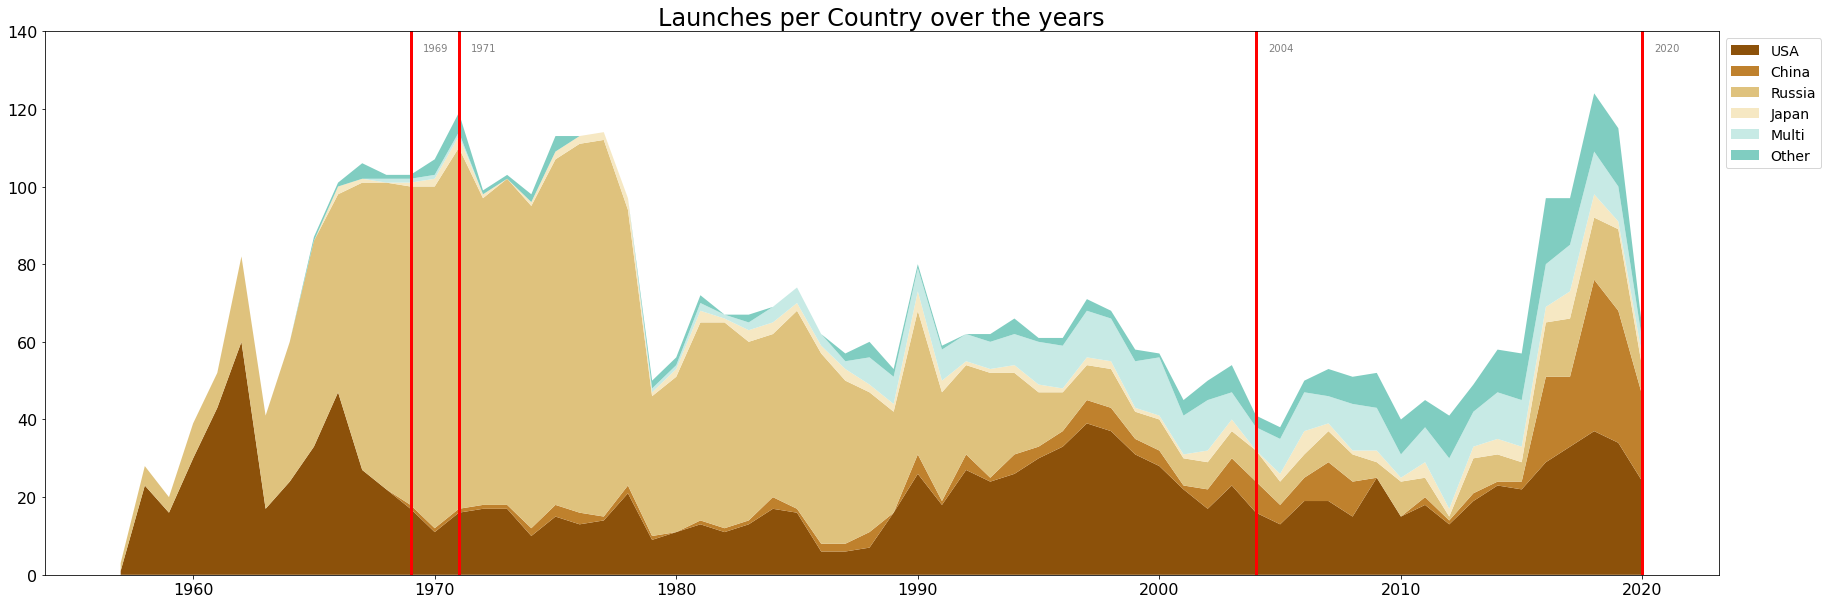

In [17]:
plt.stackplot(years,usa_list,china_list,russia_list,japan_list,multi_list,other_list)#,india_list,germany_list,nk_list,sk_list,brazil_list,ukraine_list,italy_list,france_list,england_list)
plt.rcParams["figure.figsize"] = (30,10)
plt.style.use('./resources/space-cadets.mplstyle')
plt.legend(labels=graphed_countries,bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Launches per Country over the years')
old_year = []
plt.ylim(0,140)
for i in range(len(missions_indexes)):
   #giving it smarts to know if its too close to the far right, if so flip the text to the other side of the line
   if mission_years[i] >2015:
      #13.5 seems to be the magic number here
      text_offset = -13.5
   else:
      text_offset = 1.5
   plt.axvline(x=mission_years[i],color='r')
   txt=plt.text(mission_years[i] + text_offset,130,mission_desc[i],color='k')
   year_txt=plt.text(mission_years[i] + 0.5,135,mission_years[i],color='k',backgroundcolor='1',alpha=.5)
   old_year.append(mission_years[i])
   for j in old_year:
      plt.axvline(x=j,color='r')
   plt.savefig(f'./output/alejandro/mission_{i}')
   txt.set_visible(False)